In [7]:
#Import Libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import MySQLdb





#connecting to the database
connection = pymysql.connect(host="localhost",user="root", 
                             password="AIctex92#1aB",db = "auto", charset = "utf8mb4",
                             cursorclass=pymysql.cursors.DictCursor)
with connection:
    with connection.cursor() as cursor:
        sql = "SELECT * FROM mpg"
        cursor.execute(sql)
        
#extract the data in a dataframe
    df = pd.DataFrame(cursor.fetchall())


    connection.commit()

print(df)



ModuleNotFoundError: No module named 'MySQLdb'

In [2]:
#correlation matrix
print(df.corr())

                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.776796     -0.804304   -0.777683 -0.831535   
cylinders    -0.776796   1.000000      0.950823    0.842983  0.897527   
displacement -0.804304   0.950823      1.000000    0.897259  0.932993   
horsepower   -0.777683   0.842983      0.897259    1.000000  0.864538   
weight       -0.831535   0.897527      0.932993    0.864538  1.000000   
model year    0.582750  -0.345647     -0.369873   -0.416361 -0.309120   
origin        0.563667  -0.568932     -0.614551   -0.455171 -0.585005   

              model year    origin  
mpg             0.582750  0.563667  
cylinders      -0.345647 -0.568932  
displacement   -0.369873 -0.614551  
horsepower     -0.416361 -0.455171  
weight         -0.309120 -0.585005  
model year      1.000000  0.181528  
origin          0.181528  1.000000  


In [4]:
# pull weight and mpg data
x1 = df['weight'] #predictor variable
y = df['mpg'] #response variable

# linear regression: y = b0 +b1x
x = sm.add_constant(x1) #estime b0 variable

#ordinary least squares regression 
results = sm.OLS(y,x).fit() #.fit() applies a specific estimation technique to obtain the fit model
results.summary() #desplay regression results

NameError: name 'df' is not defined

In [12]:
#pulls mpg, weight, and displacement values from auto database
dF = pd.DataFrame(df, columns=('mpg','weight','displacement'))  
X = dF[['weight','displacement']] #2 variables for multiple regression
Y = dF['mpg'] #response variable

X = sm.add_constant(X) # adding a constant
model = sm.OLS(Y, X).fit() #Fitted ordinary least squares regression model


model.summary() #display regression results


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     448.9
Date:                Sun, 01 Aug 2021   Prob (F-statistic):          8.72e-102
Time:                        19:28:01   Log-Likelihood:                -1126.4
No. Observations:                 392   AIC:                             2259.
Df Residuals:                     389   BIC:                             2271.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           43.8052      1.165     37.610      0.000      41.515      46.095
weight          -0.0058      0.001     -8.086      0.000      -0.007      -0.004
displacement    -0.0164      0.006     -2.840      0.005      -0.028      -0.005
==============================================================================
Omnibus:                       44.856   Durbin-Watson:                   0.845
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.316
Skew:                           0.753   Prob(JB):                     2.41e-15
Kurtosis:                       4.362   Cond. No.                     1.66e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.66e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1]:
#plotting regression line

plt.scatter(x1,y)

yhat = -0.0076*x1 + 46.2287 #using the values fromm .summary()
 
fig = plt.plot(x1,yhat, lw=4, c="red", label = "regression line")
 
plt.xlabel("weight", fontsize = 20)
 
plt.ylabel("mpg", fontsize = 20)
 
plt.show()

NameError: name 'plt' is not defined

In [2]:
X1=dF['weight']

X2=dF['displacement']

Y1=dF['mpg']

MPG_predictions = model.predict(X) #predicts mpg data values based on data

NameError: name 'dF' is not defined

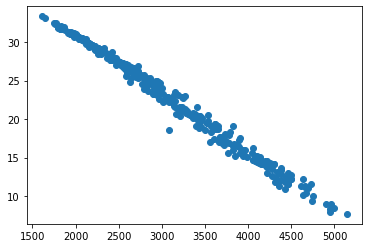

In [15]:
plt.scatter(X1, MPG_predictions) #plots predicted mpg values against weight

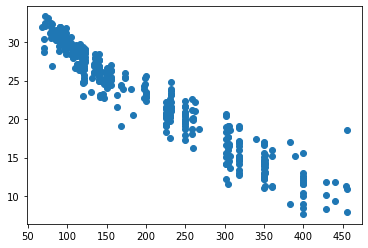

In [16]:
plt.scatter(X2, MPG_predictions) #plots predicted mpg values against displacement